# The Impact of Large Sample Sizes

__Part 1: Sampling distribution with 5 samples__

When we increase our sample size, even the smallest of differences may seem significant.To illustrate this point, work through this notebook will answer the questions from module.

Use the statements in the notebook to set up the null and alternative hypotheses.

The mean height of everyone in the population is equal to 67.60 inches.

$$\mu = 67.60$$


The mean height of everyone in the population is different from 67.60 inches.

$$\mu \,!=\, 67.6$$

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

#lets pull the coffee_dataset and give a name for the dataframe
df = pd.read_csv('coffee_dataset.csv')

__The population mean__

Which is given that 67.60

In [181]:
#lets bootstrap the sample and find the mean and store it in a vector called means5
#calculate the standard deviation of our sampling distribution

sample_df = df.sample(5)
means5 = [] 
for _ in range(10000):
    bootsample = sample_df.sample(5, replace = True)
    means5.append(bootsample.height.mean())

__The shape of the sampling ditribution for the mean of 5 values__

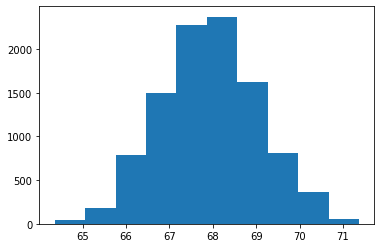

In [182]:
plt.hist(means5);

_Shape of the sampling distribution looks noramly distributed_

__The sample mean is__

In [183]:
sample_mean = sample_df.height.mean()
sample_mean

67.88234252049084

__The standard deviation of the sampling distribution for the mean of 5 values__

In [184]:
np.std(means5)

1.141357351999374

So the standard deviation of sampling distributin is 1.14

#### We know if it is came from the null hypothesis value 67.60, what it would look like?

By central limit theorem it would follow normal distribution. Now from the [numpy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) on normal distribution , we see we can simulate draws from the normal distribution using the hypothesis mean at 67.60 in the standard deviation of our sampling distribution following way.

In [185]:
#in this equation, the parameter loc which is the mean of the distribution which is 67.60, 
#and parameter scale is the standard deviation of the sampling distribution and we can simulate for a 10000 values now
null_mean  = 67.60
null_values5 = np.random.normal(null_mean, np.std(means5), 10000)

Each of the simulated draws above represents the possible means from null hypothesis, we can now ask the question where the sample mean falls in this distribution

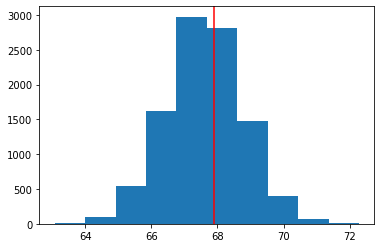

In [186]:
#plot the hisrogram and have a look at where the sample mean falls
plt.hist(null_values5);
plt.axvline(x=sample_df.height.mean(), color = 'red'); # where our sample mean falls on null distribution

_Observed sample mean is in the almost center and bulk of the simulated above null hypothesis distribution_

__Since our statistic, sample mean is from the bulk of the distribution, this suggested that the statistic is likely from our Null hupothesis.__

__The p-value that you obtain using the null from part 1__

$$\mu = 67.6$$

$$\mu_ \,!= 67.6$$

Since $\mu != 67.60$ is our alternative hypothesis, we now want to look at the values that are more extream than our sample mean in either direction away from null hypothesis, that looks like the belwo equation.

First, we look at the direction of the observed mean in relation to the null mean. In our case, the observed mean is greater than the null mean. So first of all, we are going to calculate all of the values of the null distribution that are higher than the observed mean, or the right/upper tail (we've done this before in our first example).


In [187]:
p_upper5 = (null_values5 > sample_mean).mean()
p_upper5

0.4071

The value of 'p_upper' is : 0.40

Then we need to look at the other side/tail. For us that will be the left/lower tail. The calculation goes like this:

In [188]:
diff_means = null_mean - sample_mean
lower_compare= null_mean + diff_means
lower_compare

67.31765747950915

The above first line calculates the difference between the null mean and the observed mean. The second line adds this to the null mean to get the difference on the other side. 

In [189]:
p_lower5 = (null_values5 < lower_compare).mean()
p_lower5

0.3979

And then the comparison is made for all values in the distribution that are lower than the line on the left side.

So the value for 'p_lower' will be: 0.39


To find the total p-value, we add 'p_upper' and 'p_lower' together.

In [190]:
p_val5 = p_upper5 + p_lower5
p_val5

0.8049999999999999

The p-value will be:

0.80

__Here our above pvalue 0.80, if we consider here alpha as .05, p values is > $\alpha\$ it suggest that we shouldnt move away from null hypothesis, In our case, we say that we should stay at our null hypothesis that mean is being 67.60. So we would fail to reject the nul hypothesis__

$$pval>α⇒ Fail to Reject H_{0}$$

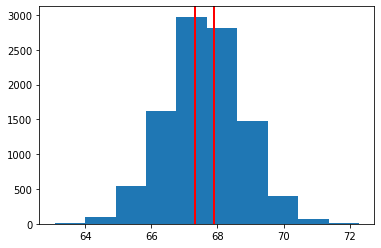

In [191]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_values5);
plt.axvline(x=low, color = 'r', linewidth = 2);
plt.axvline(x=high, color = 'r', linewidth = 2);

In [192]:
print(low, high)

67.88234252049084 67.31765747950915


__The standard deviation of population height is__

In [193]:
np.std(df.height)

3.1189087116821472

# Part 2

__Sampling distribution with 300 samples__

__The standard deviation of the sampling distribution for the mean of 300 values__

In [194]:
#repeat the same above steps in part 1, but this time with 300 samples with the same old sample mean
sample_df300 = df.sample(300)
means300 = [] 
for _ in range(10000):
    bootsample = sample_df300.sample(300, replace = True)
    means300.append(bootsample.height.mean())

In [195]:
np.std(means300)

0.1810848597411894

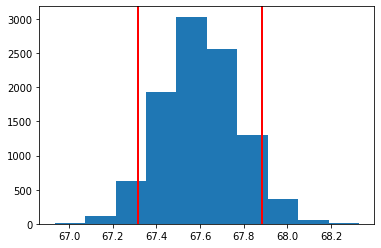

In [196]:
null_values300 = np.random.normal(null_mean, np.std(means300), 10000)
plt.hist(null_values300);
plt.axvline(x=low, color = 'r', linewidth = 2);
plt.axvline(x=high, color = 'r', linewidth = 2);

In [197]:
p_upper300 = (null_values300 > sample_mean).mean()
p_upper300

0.056

In [198]:
diff_means300 = null_mean - sample_mean
diff_means300

-0.2823425204908432

In [199]:
lower_compare = null_mean + diff_means300
lower_compare

67.31765747950915

In [200]:
p_lower300 = (null_values300 < lower_compare).mean()
p_lower300

0.0529

In [201]:
p_val300 = p_upper300 + p_lower300
p_val300

0.1089

__Here our pvalue is 0.10, if we consider here alpha as 0.1, p values is equal to $\alpha\$.
The p-value is the probability of getting our statistic or a more extreme value if the null is true.
Therefore, small p-values suggest our null is not true. Rather, our statistic is likely to have come from a 
different distribution than the null.__

$$pval≤α⇒ Reject H_{0}$$

__Even the smallest of differences between a sample mean and a hypothesized population mean are significant when we have large sample sizes.__